In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde

from tqdm import tqdm #optional, if you do not want to import remove tqdm() from loops!
import pandas as pd


# 1. Preprocessing

We again will be using the MNIST dataset. This time I prepared the dataset as a npy file. We will load the data visualize an example and the implement logistic regression.

In [62]:
df = pd.read_csv('dataset.csv')

X = df[['feature_1', 'feature_2']].values
y = df['class'].values

print(f"Total samples: {len(X)}")
print(f"Class 0: {np.sum(y == 0)} samples")
print(f"Class 1: {np.sum(y == 1)} samples")

Total samples: 1500
Class 0: 750 samples
Class 1: 750 samples


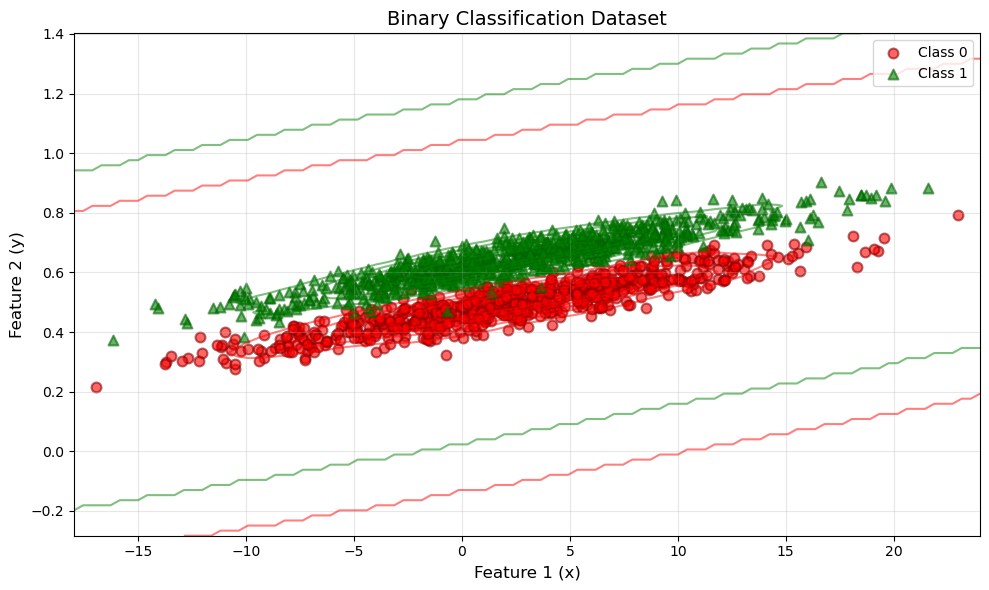

In [63]:

fig, ax = plt.subplots(figsize=(10, 6))

X_class0 = X[y == 0]
X_class1 = X[y == 1]

ax.scatter(X_class0[:, 0], X_class0[:, 1], c='red', marker='o', 
           s=50, alpha=0.6, edgecolors='darkred', linewidth=1.5, 
           facecolors='none', label='Class 0')

ax.scatter(X_class1[:, 0], X_class1[:, 1], c='green', marker='^', 
           s=50, alpha=0.6, edgecolors='darkgreen', linewidth=1.5, 
           facecolors='none', label='Class 1')

kde0 = gaussian_kde(X_class0.T)
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx0, yy0 = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
positions0 = np.vstack([xx0.ravel(), yy0.ravel()])
z0 = kde0(positions0).reshape(xx0.shape)
ax.contour(xx0, yy0, z0, colors='red', alpha=0.5, linewidths=1.5)

kde1 = gaussian_kde(X_class1.T)
xx1, yy1 = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
z1 = kde1(positions1).reshape(xx1.shape)
ax.contour(xx1, yy1, z1, colors='green', alpha=0.5, linewidths=1.5)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Feature 1 (x)', fontsize=12)
ax.set_ylabel('Feature 2 (y)', fontsize=12)
ax.set_title('Binary Classification Dataset', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [64]:
np.random.seed(42)
indices = np.random.permutation(len(X))

# Split: 80% train, 20% test
train_size = int(0.8 * len(X))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]

print(f"Training set: {x_train.shape[0]} samples")
print(f"Test set: {x_test.shape[0]} samples")

Training set: 1200 samples
Test set: 300 samples


# 2. Logistic Regression

From the lecture we know that logistic regression is given by affined transformation of the data followed by applying the sigmoid function. Our first step is to implement the function we need.

In [65]:
def layer(x, w):
    """
    Performs affine transformation: x @ w
    """
    res = np.dot(x, w)
    return res


In [66]:
def sigmoid(y):
    """
    Applies sigmoid activation: 1 / (1 + exp(-y))
    """
    res = 1 / (1 + np.exp(-y))
    return res


In [67]:
def model(x, w):
    """
    Logistic regression model: sigmoid(layer(x, w))
    """
    res = sigmoid(layer(x, w))
    return res


### 2.2.3 Newton’s method
In this section implement Newton's method

In [68]:
def newtonMethod(x, y, w):
    """
    Performs one Newton update step
    """
    # Predictions
    p = model(x, w)
    
    # Gradient
    grad = x.T @ (p - y)
    
    # Hessian
    S = np.diag(p * (1 - p))
    H = x.T @ S @ x
    
    # Update
    w_update = w - np.linalg.inv(H) @ grad
    return w_update


# 3. Training with Newton's method
Now use the dataset to train a classifier and compare the results.

In [69]:
#TODO: Implement training for newton's method. Also evaluate youre model after each epoch on the test data and save the accuracy.
# Start with random initialization of learnable parameters
# Put your code here:
# Start
# END

In [70]:
# Adding bias term to features
x_train_bias = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
x_test_bias = np.hstack([np.ones((x_test.shape[0], 1)), x_test])

# Initializing weights
w = np.zeros(x_train_bias.shape[1])

epochs = 15
train_accs = []
test_accs = []

for epoch in range(epochs):
    w = newtonMethod(x_train_bias, y_train, w)
    
    # Predictions
    train_preds = (model(x_train_bias, w) >= 0.5).astype(int)
    test_preds = (model(x_test_bias, w) >= 0.5).astype(int)
    
    # Accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"Epoch {epoch+1}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")


Epoch 1: Train Acc = 0.9875, Test Acc = 0.9833
Epoch 2: Train Acc = 0.9875, Test Acc = 0.9833
Epoch 3: Train Acc = 0.9875, Test Acc = 0.9833
Epoch 4: Train Acc = 0.9875, Test Acc = 0.9833
Epoch 5: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 6: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 7: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 8: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 9: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 10: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 11: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 12: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 13: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 14: Train Acc = 0.9867, Test Acc = 0.9833
Epoch 15: Train Acc = 0.9867, Test Acc = 0.9833


In [71]:
#TODO: Plot the training and validation accuracy curves after each epoch
# Put your code here:
# Start
# END

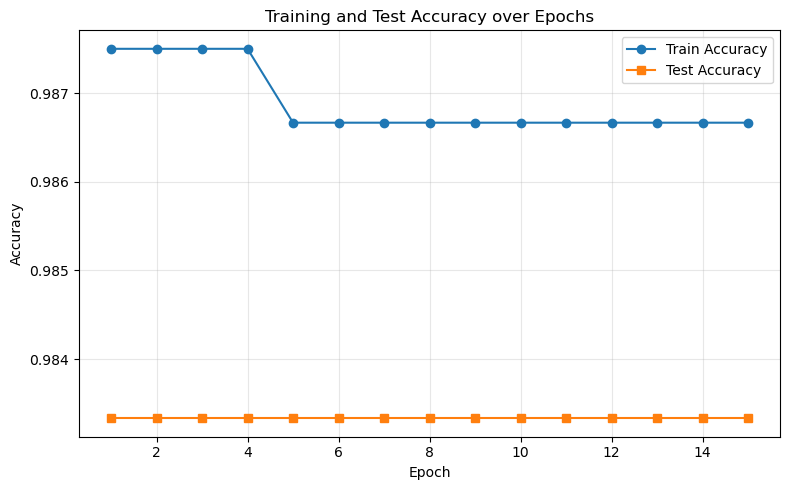

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_accs, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs+1), test_accs, label='Test Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
